In [1]:
import os, sys
import pandas as pd
import numpy as np
import numpy.matlib
import scipy as sp

import geopandas as gpd

# Plotting
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from IPython.display import clear_output

In [3]:
def update_progress(progress, my_str = ''):
    bar_length = 20
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
    if progress < 0:
        progress = 0
    if progress >= 1:
        progress = 1

    block = int(round(bar_length * progress))

    clear_output(wait = True)
    text = my_str + " Progress: [{0}] {1:.1f}%".format( "#" * block + "-" * (bar_length - block), progress * 100)
    print(text)

In [4]:
my_map = gpd.read_file('/Users/lindenmp/Dropbox/PersonalProjects/NASA_aus_firedata/data/my_map.shp')

In [5]:
df = gpd.read_file('/Users/lindenmp/Dropbox/PersonalProjects/NASA_aus_firedata/data/df.shp')
df.shape

(450028, 16)

In [6]:
df.head()

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE,geometry
0,-30.5863,151.2951,325.7,1.0,1.0,2000-11-01,0019,Terra,MODIS,80,6.2,293.9,18.1,D,0,POINT (151.29510 -30.58630)
1,-30.5773,151.2968,313.0,1.0,1.0,2000-11-01,0019,Terra,MODIS,52,6.2,294.5,6.1,D,0,POINT (151.29680 -30.57730)
2,-30.7754,151.1438,342.8,1.0,1.0,2000-11-01,0019,Terra,MODIS,80,6.2,294.2,42.9,D,0,POINT (151.14380 -30.77540)
3,-30.3560,151.7422,316.8,1.0,1.0,2000-11-01,0019,Terra,MODIS,69,6.2,295.7,9.0,D,0,POINT (151.74220 -30.35600)
4,-31.5540,147.0632,318.9,1.3,1.1,2000-11-01,0020,Terra,MODIS,73,6.2,296.2,12.6,D,0,POINT (147.06320 -31.55400)


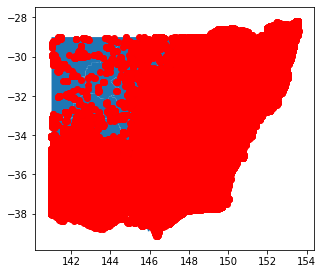

In [7]:
fig, ax = plt.subplots(figsize = (5,5))
my_map.plot(ax = ax)
df.plot(ax = ax, color = 'r')

In [8]:
my_map

,POA_NAME,code,state,geometry
0,2648,2648,None,"POLYGON ((141.15285 -34.07935, 141.15286 -34.0..."
1,2717,2717,None,"POLYGON ((142.02848 -34.12087, 142.02849 -34.1..."
2,2735,2735,None,"POLYGON ((143.59179 -35.07012, 143.59177 -35.0..."
3,2736,2736,None,"POLYGON ((143.33290 -35.02792, 143.33290 -35.0..."
4,2737,2737,None,"POLYGON ((142.69939 -34.60174, 142.69941 -34.6..."
...,...,...,...,...
1292,3890,3890,None,"POLYGON ((149.15579 -37.56446, 149.15663 -37.5..."
1293,3891,3891,None,"MULTIPOLYGON (((149.69513 -37.65429, 149.69509..."
1294,3892,3892,None,"POLYGON ((149.75386 -37.55637, 149.75388 -37.5..."
1295,3903,3903,None,"POLYGON ((147.83208 -37.82768, 147.83138 -37.8..."


In [9]:
df['postcode'] = np.zeros(df.shape[0],).astype(int)

In [10]:
df.head()

,LATITUDE,LONGITUDE,BRIGHTNESS,SCAN,TRACK,ACQ_DATE,ACQ_TIME,SATELLITE,INSTRUMENT,CONFIDENCE,VERSION,BRIGHT_T31,FRP,DAYNIGHT,TYPE,geometry,postcode
0,-30.5863,151.2951,325.7,1.0,1.0,2000-11-01,0019,Terra,MODIS,80,6.2,293.9,18.1,D,0,POINT (151.29510 -30.58630),0
1,-30.5773,151.2968,313.0,1.0,1.0,2000-11-01,0019,Terra,MODIS,52,6.2,294.5,6.1,D,0,POINT (151.29680 -30.57730),0
2,-30.7754,151.1438,342.8,1.0,1.0,2000-11-01,0019,Terra,MODIS,80,6.2,294.2,42.9,D,0,POINT (151.14380 -30.77540),0
3,-30.3560,151.7422,316.8,1.0,1.0,2000-11-01,0019,Terra,MODIS,69,6.2,295.7,9.0,D,0,POINT (151.74220 -30.35600),0
4,-31.5540,147.0632,318.9,1.3,1.1,2000-11-01,0020,Terra,MODIS,73,6.2,296.2,12.6,D,0,POINT (147.06320 -31.55400),0


In [11]:
postcodes = my_map['code'].unique()

for i, postcode in enumerate(postcodes):
    update_progress(i/len(postcodes))
    mask = my_map.loc[my_map['code'] == postcode,'geometry'].unary_union
    my_bool = df.geometry.within(mask)
    df.loc[my_bool,'postcode'] = postcode
update_progress(1)

 Progress: [####################] 100.0%


## Save out

In [12]:
df.to_file('/Users/lindenmp/Dropbox/PersonalProjects/NASA_aus_firedata/data/df_postcode.shp')